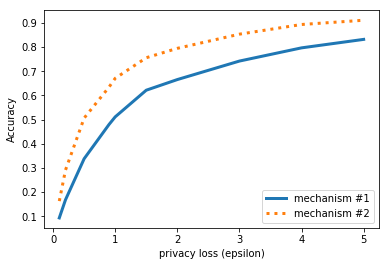

In [46]:
"""Make some graphs showing the tradeoff between accuracy and privacy"""
import numpy as np
import numpy.random
import matplotlib.pyplot as plt


RUNS_PER_EPSILON=1000
EPSILON_RANGE=[.1,.2,.5,0.9,1.0,1.5,2.0,3.0,4.0,5.0]
TRUE_VALUE=10
SENSITIVITY=1

def dp_laplace(*,private_x, sensitivity, epsilon):
    """This versin of the """
    return np.random.laplace(private_x, sensitivity/epsilon )

def accuracy_for_epsilon(*,epsilon,sensitivity=1):
    """return 1-TVD (scales 0..1)"""
    private_x = [TRUE_VALUE] * RUNS_PER_EPSILON
    public_x  = dp_laplace(private_x=private_x, epsilon=epsilon, sensitivity=sensitivity)
    return 1/(1+np.sum(np.abs(private_x - public_x))/len(private_x))
    
y = [accuracy_for_epsilon(epsilon=e,sensitivity=1) for e in EPSILON_RANGE]
y2 = [accuracy_for_epsilon(epsilon=e,sensitivity=.5) for e in EPSILON_RANGE]


plt.plot(EPSILON_RANGE, y, label='mechanism #1', linewidth=3)
plt.plot(EPSILON_RANGE, y2, label='mechanism #2', linewidth=3, linestyle=':')

plt.ylabel("Accuracy")
plt.xlabel("privacy loss (epsilon)")
plt.legend(loc='lower right')
plt.savefig("dp-graph.pdf")
plt.show()

    